In [1]:
#  Include these observations at the top of notebook.
#  ===========================================================
#1  Observing the outliers by studied druoga regimen, we indicate that for the Capomulin regimen Volume values (mm3) 
#  that are outside our lower bound 20.70 can be considered minor outliers, and values outside our upper bound 63.50 
#   can be considered greater outier

#2  Ramicane regime case: Volume values (mm3) that are outside our lower bound 17.91 can be considered minor outliers, 
#  and values outside our upper bound 54.30 can be considered greater outier

#3  Case of the Infubinol regimen: Volume values (mm3) that are outside our lower bound 36.83 can be 
#  considered minor outliers, and values outside our upper bound 99.95 can be considered greater outier

#4  Case of the Ceftamin regimen: Volume values (mm3) that are outside our lower bound 25.35 can be 
#   considered minor outliers, and values outside our upper bound 111.03 can be considered greater outier

#5  For the selected g288 Male mouse, the data visually reflect that as more drug doses are applied, 
#  the tumor volume (mm3) decreases, suggesting that it has been effective in this mouse.

#6  Analyzing the correlation for the Capomulin regime between the dependent variable volume (mm3) 
#  and the independent variable Weight (g) It is observed that they have a very high correlation
#  based on the measurement 0.877, that is: 87.7%, in other words, they are directly proportional, 
#  as the Weight (g) of the mouse increases in the same proportion the volume of the tumor increases (mm3)

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
# Download Scipy command:
# python -m pip install --user numpy scipy matplotlib ipython jupyter pandas sympy nose
import scipy.stats as st

In [3]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
print(mouse_metadata)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]


In [4]:
#mouse_read = mouse_metadata.groupby(["Mouse ID"]).size()
# Combine the data into a single dataset
Study_Mouse_Data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
index = Study_Mouse_Data.index
number_of_rows = len(index) #find length of index.
print("number of rows", number_of_rows, sep='\n')
# Display the data table for preview
Study_Mouse_Data

number of rows
1893


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Total missing values for each feature
print(Study_Mouse_Data.isnull().sum()) # no null values found
# Checking the number of mice.

Total_mice = len(set(mouse_metadata["Mouse ID"]))
print("Total mice: " + str(Total_mice))

Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64
Total mice: 249


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#DataFrame.duplicated(subset = None, keep = ‘first’)
Mouse_Time_duplicate_rows = Study_Mouse_Data[Study_Mouse_Data.duplicated(["Mouse ID", "Timepoint"], keep = "first")] 
print("Duplicate Rows based on Mouse ID and Timepoint :", sep='\n') 
Mouse_Time_duplicate_rows


Duplicate Rows based on Mouse ID and Timepoint :


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
Mouse_id_duplicate_rows = Study_Mouse_Data[Study_Mouse_Data.duplicated(subset=None, keep='first')]
print("Duplicate Rows based on Mouse ID :", sep='\n') 
Mouse_id_duplicate_rows


Duplicate Rows based on Mouse ID :


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
newStudy_Mouse_Data = Study_Mouse_Data.reset_index()
newStudy_Mouse_Data = newStudy_Mouse_Data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep = "first")
newStudy_Mouse_Data = newStudy_Mouse_Data.set_index("index")
print("New Dataframe", sep='\n')
newStudy_Mouse_Data
#df1 = df.reset_index().drop_duplicates(subset=['Age','Height'],
                                      # keep='first').set_index('index')

New Dataframe


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
index,,,,,,,,
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
newTotal_mice = len(set(newStudy_Mouse_Data["Mouse ID"]))
print("Total mice new: " + str(newTotal_mice))

Total mice new: 249


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_regimen_df = newStudy_Mouse_Data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
Median_regimen_df = newStudy_Mouse_Data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_regimen_df = newStudy_Mouse_Data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sta_dev_regimen_df = newStudy_Mouse_Data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
SEM_regimen_df = newStudy_Mouse_Data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
regimen_df = pd.DataFrame({"Mean": round(mean_regimen_df,2), "Median":round(Median_regimen_df,2),
                           "Variance":round(variance_regimen_df,2), "Standard Deviation":round(sta_dev_regimen_df,2),
                           "SEM":round(SEM_regimen_df,2)})
print("summary statistics table", sep='\n')
regimen_df

summary statistics table


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
#regimen_df.describe()
aggregation_regimen_df = newStudy_Mouse_Data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": \
                                                    ['mean', 'median', 'var', 'std', 'sem']})
print(aggregation_regimen_df)

             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


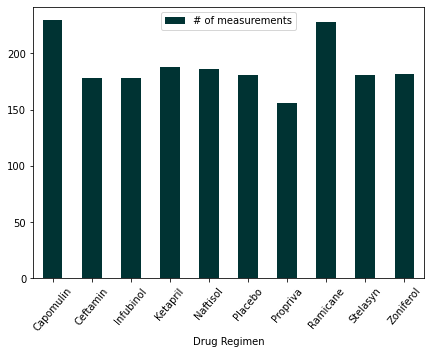

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements_taken = (newStudy_Mouse_Data.groupby(["Drug Regimen"]).count()["Timepoint"]).to_frame()
#measurements_taken1 = measurements_taken.to_frame()
measurements_taken = measurements_taken.rename(columns={"Timepoint":"# of measurements"})
#print(measurements_taken)
# first create a Pandas Series or DataFrame and then using the .plot() command. Dataframe.plot.bar()
measurements_taken.plot.bar(figsize=(7,5), rot=50, color='#003333');

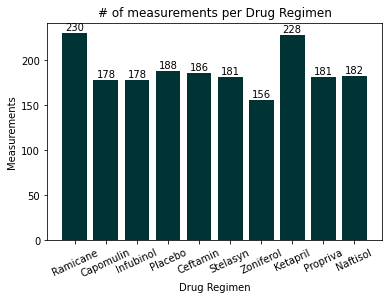

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen = newStudy_Mouse_Data["Drug Regimen"].unique()
y_axis = newStudy_Mouse_Data.groupby(newStudy_Mouse_Data["Drug Regimen"])['Timepoint'].count()
x_axis = np.arange(len(regimen))
#print(x_axis)
#y_axis
fig, ax = plt.subplots()
plt.xticks(x_axis, regimen, rotation=25)

# plot the bar graph
plot = ax.bar(x_axis, y_axis, color='#003333', align="center")

for rect in plot:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.002*height,'%d' % int(height), ha='center', va='bottom')

#Display the graph on the screen
plt.xlabel("Drug Regimen")
plt.ylabel("Measurements")
plt.title("# of measurements per Drug Regimen")
plt.show();

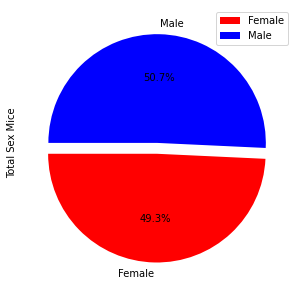

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_data = (newStudy_Mouse_Data.groupby(newStudy_Mouse_Data["Sex"])["Drug Regimen"].count()).to_frame()
#print(pie_data);
pie_data = pie_data.rename(columns={"Drug Regimen":"Total Sex Mice"})
pie_data.plot.pie(colors = ["red", "blue"], startangle=180, autopct='%2.1f%%', subplots=True, figsize=(5,5), explode = (0.1,0));


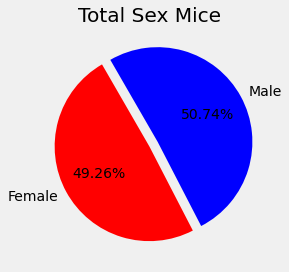

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = pie_data.index
sizes = pie_data["Total Sex Mice"] # Add upto 100%
#sizes = newStudy_Mouse_Data
#print(sizes);
cl=['red', 'blue']
exp = (0, 0.1) # only "explode" the 2nd slice (i.e. 'Male')
plt.style.use("fivethirtyeight") # fivethirtyeight
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%0.2f%%', colors=cl, explode=exp, shadow=False, startangle=120, radius=1);
plt.title("Total Sex Mice" )
plt.tight_layout()
# Below line not required for 3.0, for ellptical shape use ax1.axis('auto') or ax1.set_aspect('auto')
#ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle. 

plt.show()

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
Capomulin_loc = newStudy_Mouse_Data.loc[newStudy_Mouse_Data["Drug Regimen"] == "Capomulin",:] #filtered by drug regime Capomulin
Ramicane_loc = newStudy_Mouse_Data.loc[newStudy_Mouse_Data["Drug Regimen"] == "Ramicane", :] #filtered by drug regime Ramicane
Infubinol_loc = newStudy_Mouse_Data.loc[newStudy_Mouse_Data["Drug Regimen"] == "Infubinol", :] #filtered by drug regime Infubinol
Ceftamin_loc = newStudy_Mouse_Data.loc[newStudy_Mouse_Data["Drug Regimen"] == "Ceftamin", :] #filtered by drug regime Ceftamin

#treatment regimens Capomulin
Capomulin_max = Capomulin_loc.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_max) # I convert it to data frame to merge and get all data
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_All = pd.merge(Capomulin_vol, newStudy_Mouse_Data, on=("Mouse ID","Timepoint"), how="left")
Capomulin_All.head(6)
#reading = Capomulin_loc[(Capomulin_loc["Mouse ID"]=='s185') & (Capomulin_loc["Drug Regimen"]=='Capomulin')]
#reading

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1


In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
#capo_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
# Put treatments into a list for loop (and later for plot labels)
Tumor_Volume_Capomulin = Capomulin_All["Tumor Volume (mm3)"]
Tumor_Volume_sort_asc  = Capomulin_All.sort_values(["Tumor Volume (mm3)"], ascending=True)
Capomulin_Min =Tumor_Volume_sort_asc.iloc[0]['Tumor Volume (mm3)']
Capomulin_Min
Capomulin_Max =Tumor_Volume_sort_asc.iloc[-1]['Tumor Volume (mm3)']
Capomulin_Max
Range = Capomulin_Max - Capomulin_Min
Quartile_Statistics = Tumor_Volume_Capomulin.quantile([.25,.5,.75])
Capomulin_Q1 = Quartile_Statistics[0.25] # lower quartile Q1
Capomulin_Q2 = Quartile_Statistics[0.5] # The quartile Q2 
Capomulin_Q3 = Quartile_Statistics[0.75] # The upper quartile Q3 
# IQR = Q3 - Q1 (Interquartile Range)
Capomulin_IQR = Capomulin_Q3-Capomulin_Q1 # Interquartile Range
#  === Find the "inner fences" for the data set ===
inner_fenceslow = Capomulin_Q1 - Capomulin_IQR*1.5 
inner_fencesup = Capomulin_Q3 + Capomulin_IQR*1.5 
#  === Find the "outer fences" for the data set ===
outer_fenceslow = Capomulin_Q1 - Capomulin_IQR*3 
outer_fencesup = Capomulin_Q3 + Capomulin_IQR*3 

print(f"Capomulin Quartile Statistics:")
print("==============================:")
print(f"the boundaries of our inner fence are: {inner_fenceslow} and {inner_fencesup}")
print(f"the boundaries of our outer fence are: {outer_fenceslow} and {outer_fencesup}")
print(f"First Quartile Q1: {Capomulin_Q1}")
print(f"Second Quartile Q2: {Capomulin_Q2}")
print(f"Third Quartile Q3: {Capomulin_Q3}")
print(f"Interquartile Range IQR: {Capomulin_IQR}")
print(f"Median = Q2: {Capomulin_Q2}")
print(f"Minimum value:{Capomulin_Min}")
print(f"Maximum value: {Capomulin_Max}")
print(f"Range: {Range}")

Capomulin Quartile Statistics:
==============================:
the boundaries of our inner fence are: 20.70456164999999 and 51.83201549
the boundaries of our outer fence are: 9.031766459999986 and 63.50481068000001
First Quartile Q1: 32.37735684
Second Quartile Q2: 38.1251644
Third Quartile Q3: 40.1592203
Interquartile Range IQR: 7.781863460000004
Median = Q2: 38.1251644
Minimum value:23.34359787
Maximum value: 47.68596303
Range: 24.342365160000003


In [18]:
#treatment regimens Ramicane
Ramicane_max = Ramicane_loc.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_max) # I convert it to data frame to merge and get all data
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ramicane_All = pd.merge(Ramicane_vol, newStudy_Mouse_Data, on=("Mouse ID","Timepoint"), how="left")
Ramicane_All.head(6)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1


In [19]:
# Put treatments into a list for loop (and later for plot labels)
Tumor_Volume_Ramicane = Ramicane_All["Tumor Volume (mm3)"]
Tumor_Volume_sort_asc  = Ramicane_All.sort_values(["Tumor Volume (mm3)"], ascending=True)
Ramicane_Min =Tumor_Volume_sort_asc.iloc[0]['Tumor Volume (mm3)']
Ramicane_Min
Ramicane_Max =Tumor_Volume_sort_asc.iloc[-1]['Tumor Volume (mm3)']
Ramicane_Max
Range = Ramicane_Max - Ramicane_Min
Quartile_Statistics = Tumor_Volume_Ramicane.quantile([.25,.5,.75])
Ramicane_Q1 = Quartile_Statistics[0.25] # lower quartile Q1
Ramicane_Q2 = Quartile_Statistics[0.5] # The quartile Q3 
Ramicane_Q3 = Quartile_Statistics[0.75] # The upper quartile Q3 
# IQR = Q3 - Q1 (Interquartile Range)
Ramicane_IQR = Ramicane_Q3-Ramicane_Q1 # Interquartile Range
#  === Find the "inner fences" for the data set ===
inner_fenceslow = Ramicane_Q1 - Ramicane_IQR*1.5 
inner_fencesup = Ramicane_Q3 + Ramicane_IQR*1.5 
#  === Find the "outer fences" for the data set ===
outer_fenceslow = Ramicane_Q1 - Ramicane_IQR*3 
outer_fencesup = Ramicane_Q3 + Ramicane_IQR*3 

print(f"Ramicane Quartile Statistics:")
print("==============================:")
print(f"the boundaries of our inner fence are: {inner_fenceslow} and {inner_fencesup}")
print(f"the boundaries of our outer fence are: {outer_fenceslow} and {outer_fencesup}")
print(f"First Quartile Q1: {Ramicane_Q1}")
print(f"Second Quartile Q2: {Ramicane_Q2}")
print(f"Third Quartile Q3: {Ramicane_Q3}")
print(f"Interquartile Range IQR: {Ramicane_IQR}")
print(f"Median = Q2: {Ramicane_Q2}")
print(f"Minimum:{Ramicane_Min}")
print(f"Maximum: {Ramicane_Max}")
print(f"Range: {Range}")

Ramicane Quartile Statistics:
==============================:
the boundaries of our inner fence are: 17.912664470000003 and 54.30681135
the boundaries of our outer fence are: 4.264859390000005 and 67.95461642999999
First Quartile Q1: 31.56046955
Second Quartile Q2: 36.56165229
Third Quartile Q3: 40.65900627
Interquartile Range IQR: 9.098536719999998
Median = Q2: 36.56165229
Minimum:22.05012627
Maximum: 45.22086888
Range: 23.170742609999998


In [20]:
#treatment regimens Infubinol
Infubinol_max = Infubinol_loc.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_max) # I convert it to data frame to merge and get all data
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Infubinol_All = pd.merge(Infubinol_vol, newStudy_Mouse_Data, on=("Mouse ID","Timepoint"), how="left")
Infubinol_All.head(6)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0


In [21]:
# Put treatments into a list for loop (and later for plot labels)
Tumor_Volume_Infubinol = Infubinol_All["Tumor Volume (mm3)"]
Tumor_Volume_sort_asc  = Infubinol_All.sort_values(["Tumor Volume (mm3)"], ascending=True)
Infubinol_Min =Tumor_Volume_sort_asc.iloc[0]['Tumor Volume (mm3)']
Infubinol_Min
Infubinol_Max =Tumor_Volume_sort_asc.iloc[-1]['Tumor Volume (mm3)']
Infubinol_Max
Range = Infubinol_Max - Infubinol_Min
Quartile_Statistics = Tumor_Volume_Infubinol.quantile([.25,.5,.75])
Infubinol_Q1 = Quartile_Statistics[0.25] # lower quartile Q1
Infubinol_Q2 = Quartile_Statistics[0.5] # The upper quartile Q3 
Infubinol_Q3 = Quartile_Statistics[0.75] # The upper quartile Q3 
# IQR = Q3 - Q1 (Interquartile Range)
Infubinol_IQR = Infubinol_Q3-Infubinol_Q1 # Interquartile Range
#  === Find the "inner fences" for the data set ===
inner_fenceslow = Infubinol_Q1 - Infubinol_IQR*1.5 
inner_fencesup = Infubinol_Q3 + Infubinol_IQR*1.5 
#  === Find the "outer fences" for the data set ===
outer_fenceslow = Infubinol_Q1 - Infubinol_IQR*3 
outer_fencesup = Infubinol_Q3 + Infubinol_IQR*3 
print(f"Infubinol Quartile Statistics:")
print("==============================:")
print(f"the boundaries of our inner fence are: {inner_fenceslow} and {inner_fencesup}")
print(f"the boundaries of our outer fence are: {outer_fenceslow} and {outer_fencesup}")
print(f"First Quartile Q1: {Infubinol_Q1}")
print(f"Second Quartile Q2: {Infubinol_Q2}")
print(f"Third Quartile Q3: {Infubinol_Q3}")
print(f"Interquartile Range IQR: {Infubinol_IQR}")
print(f"Median = Q2: {Infubinol_Q2}")
print(f"Minimum:{Infubinol_Min}")
print(f"Maximum: {Infubinol_Max}")
print(f"Range: {Range}")

Infubinol Quartile Statistics:
==============================:
the boundaries of our inner fence are: 36.83290494999999 and 82.74144559000001
the boundaries of our outer fence are: 19.617202209999988 and 99.95714833000001
First Quartile Q1: 54.04860769
Second Quartile Q2: 60.16518046
Third Quartile Q3: 65.52574285
Interquartile Range IQR: 11.477135160000003
Median = Q2: 60.16518046
Minimum:36.3213458
Maximum: 72.2267309
Range: 35.905385100000004


In [22]:
#treatment regimens Infubinol
Ceftamin_max = Ceftamin_loc.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_max) # I convert it to data frame to merge and get all data
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ceftamin_All = pd.merge(Ceftamin_vol, newStudy_Mouse_Data, on=("Mouse ID","Timepoint"), how="left")
Ceftamin_All.head(6)
#reading = Capomulin_loc[(Capomulin_loc["Mouse ID"]=='s185') & (Capomulin_loc["Drug Regimen"]=='Capomulin')]
#Reading

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0


In [23]:
# Put treatments into a list for loop (and later for plot labels)
Tumor_Volume_Ceftamin = Ceftamin_All["Tumor Volume (mm3)"]
Tumor_Volume_sort_asc  = Ceftamin_All.sort_values(["Tumor Volume (mm3)"], ascending=True)
Ceftamin_Min =Tumor_Volume_sort_asc.iloc[0]['Tumor Volume (mm3)']
Ceftamin_Min
Ceftamin_Max =Tumor_Volume_sort_asc.iloc[-1]['Tumor Volume (mm3)']
Ceftamin_Max
Range = Ceftamin_Max - Ceftamin_Min
Quartile_Statistics = Tumor_Volume_Ceftamin.quantile([.25,.5,.75])
Ceftamin_Q1 = Quartile_Statistics[0.25] # lower quartile Q1
Ceftamin_Q2 = Quartile_Statistics[0.5] # The quartile Q2 
Ceftamin_Q3 = Quartile_Statistics[0.75] # The upper quartile Q3 
# IQR = Q3 - Q1 (Interquartile Range)
Ceftamin_IQR = Ceftamin_Q3-Ceftamin_Q1 # Interquartile Range
#  === Find the "inner fences" for the data set ===
inner_fenceslow = Ceftamin_Q1 - Ceftamin_IQR*1.5 
inner_fencesup = Ceftamin_Q3 + Ceftamin_IQR*1.5 
#  === Find the "outer fences" for the data set ===
outer_fenceslow = Ceftamin_Q1 - Ceftamin_IQR*3 
outer_fencesup = Ceftamin_Q3 + Ceftamin_IQR*3 
print(f"Ceftamin Quartile Statistics:")
print("==============================:")
print(f"the boundaries of our inner fence are: {inner_fenceslow} and {inner_fencesup}")
print(f"the boundaries of our outer fence are: {outer_fenceslow} and {outer_fencesup}")
print(f"First Quartile Q1: {Ceftamin_Q1}")
print(f"Second Quartile Q2: {Ceftamin_Q2}")
print(f"Third Quartile Q3: {Ceftamin_Q3}")
print(f"Interquartile Range IQR: {Ceftamin_IQR}")
print(f"Median = Q2: {Ceftamin_Q2}")
print(f"Minimum:{Ceftamin_Min}")
print(f"Maximum: {Ceftamin_Max}")
print(f"Range: {Range}")

Ceftamin Quartile Statistics:
==============================:
the boundaries of our inner fence are: 25.355449580000002 and 87.66645829999999
the boundaries of our outer fence are: 1.9888213100000058 and 111.03308657
First Quartile Q1: 48.72207785
Second Quartile Q2: 59.85195552
Third Quartile Q3: 64.29983003
Interquartile Range IQR: 15.577752179999997
Median = Q2: 59.85195552
Minimum:45.0
Maximum: 68.92318457
Range: 23.923184570000004


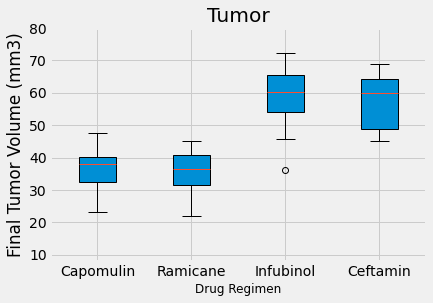

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [Tumor_Volume_Capomulin, Tumor_Volume_Ramicane, Tumor_Volume_Infubinol, Tumor_Volume_Ceftamin]
Regimen= ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

fig1, ax1 = plt.subplots(figsize=(6, 4))
ax1.set_title('Tumor')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen', fontsize = 12)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(8, 80)
plt.show()

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse
#mouse id = g288
Capomulin_line = newStudy_Mouse_Data[(Capomulin_loc["Mouse ID"]=='g288') & (newStudy_Mouse_Data["Drug Regimen"]=='Capomulin')]
Capomulin_line

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
index,,,,,,,,
235,g288,Capomulin,Male,3,19,0,45.000000,0
236,g288,Capomulin,Male,3,19,5,45.839400,0
237,g288,Capomulin,Male,3,19,10,46.304003,1
238,g288,Capomulin,Male,3,19,15,42.172301,1
239,g288,Capomulin,Male,3,19,20,42.957120,1
240,g288,Capomulin,Male,3,19,25,42.368692,1
241,g288,Capomulin,Male,3,19,30,42.874461,1
242,g288,Capomulin,Male,3,19,35,38.954115,1
243,g288,Capomulin,Male,3,19,40,36.356851,1


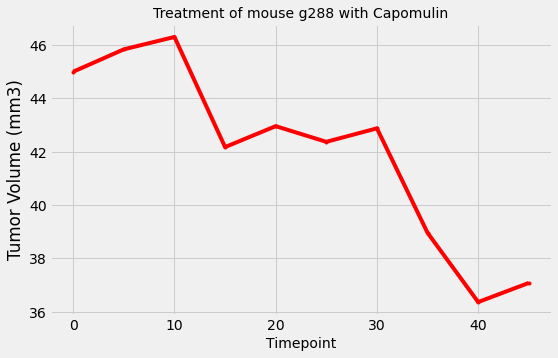

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.figure(figsize=(8,5))
plt.plot(Capomulin_line["Timepoint"], Capomulin_line["Tumor Volume (mm3)"], "r.-", label="g288")
plt.title("Treatment of mouse g288 with Capomulin", fontsize =14)
plt.xlabel('Timepoint',fontsize =14)
plt.ylabel("Tumor Volume (mm3)")
#plt.legend()
plt.show;

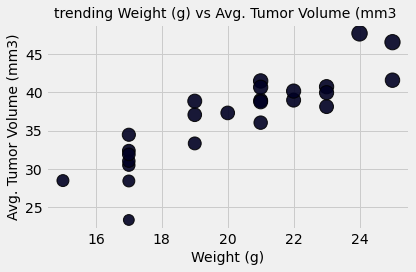

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_capom_vol=Capomulin_All.groupby(['Mouse ID']).mean().round(2)
avg_capom_vol
Xvalues= list(avg_capom_vol["Weight (g)"])
Yvalues = list(avg_capom_vol["Tumor Volume (mm3)"])
sizes = list(avg_capom_vol["Tumor Volume (mm3)"]*5)
plt.scatter(Xvalues,Yvalues, s=100, c="#000023", alpha=0.9, linewidths=1, edgecolors="black", sizes=sizes, cmap="viridis")
plt.title("trending Weight (g) vs Avg. Tumor Volume (mm3 ", size=14)
plt.xlabel("Weight (g)", size=14)
plt.ylabel("Avg. Tumor Volume (mm3)", size=14)
plt.tight_layout()
#Avg_tumor_Vol["Weight (g)"]

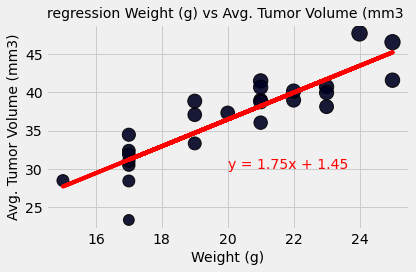

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Xvalues= avg_capom_vol["Weight (g)"]
Yvalues = avg_capom_vol["Tumor Volume (mm3)"]
sizes = list(avg_capom_vol["Tumor Volume (mm3)"]*5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(Xvalues, Yvalues)
#print(f":{intercept}");
regress_values = Xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Xvalues,Yvalues, s=100, c="#000023", alpha=0.9, linewidths=1, edgecolors="black", sizes=sizes, cmap="viridis")
plt.plot(Xvalues,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=14, color="red")
plt.title("regression Weight (g) vs Avg. Tumor Volume (mm3 ", size=14)
plt.xlabel("Weight (g)", size=14)
plt.ylabel("Avg. Tumor Volume (mm3)", size=14)
plt.tight_layout()
plt.show();

In [29]:
# correlation coefficient and linear regression model
correlation = avg_capom_vol.corr(method ='pearson') # corr() used to find the pairwise correlation of all columns in the dataframe
corr_value_Capomulin = round(correlation.iloc[2]['Tumor Volume (mm3)'],3)
correlation_Capomulin  = pd.DataFrame({"the slope":[round(slope,3)], "the intercept":[round(intercept,3)],
                                 "the rvalue":[round(rvalue,3)], "corr(method ='pearson')":[round(corr_value_Capomulin,3)],
                                 "standard error":[round(stderr,3)], "linear regression":[line_eq]})
correlation_Capomulin

,the slope,the intercept,the rvalue,corr(method ='pearson'),standard error,linear regression
0,1.751,1.447,0.877,0.877,0.2,y = 1.75x + 1.45
